| Data name| In master function |  All years dataframe
| -------- | -------- |  -------- | 
|Schüler/-innen je Lehrkraft | teachers_yyyy| teachers_concat
|Anzahl an Lehrkräften | students_per_teacher_yyyy| students_per_teacher_concat
|Anzahl an Schülern | students_yyyy| students_concat
|Unterichtsstd. Je Schüler	| hours_per_student_yyyy|hours_per_student_concat
|Ausgaben 	| ausgaben_yyyy|ausgaben_concat

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.max_rows', None)

from master import hours_per_student_concat

/Users/kamilkarim/neuefische/capstone_project_hh_23_1/master.py:212: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ausgaben.iloc[:, 1:15] = ausgaben.iloc[:, 1:15].astype('Int64')
/Users/kamilkarim/neuefische/capstone_project_hh_23_1/master.py:212: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ausgaben.iloc[:, 1:15] = ausgaben.iloc[:, 1:15].astype('Int64')
/Users/kamilkarim/neuefische/capstone_project_hh_23_1/master.py:212: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a 

In [2]:
hours_per_student_concat

,SchoolType,Baden-Wüttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Deutschland,Year
0,Allgemeinbildende Schulen,1.713945,1.585794,1.754554,1.770079,1.714481,1.690766,1.648265,1.788607,1.566029,1.523436,1.617019,1.699214,1.782667,1.856108,1.524647,1.830527,1.626870,2011
1,Förderschulen,5.322422,3.174173,3.976845,4.241515,4.702265,3.895806,4.469091,3.223718,3.733670,4.037930,4.060919,4.326110,3.722410,3.548922,4.031242,3.720916,4.039715,2011
2,Sekundarstufe I,1.573263,1.560799,1.795453,1.787801,1.664775,1.611509,1.533235,1.830719,1.482593,1.438379,1.466960,1.545581,1.751113,1.772398,1.472075,1.822960,1.549745,2011
3,Sekundarstufe I,1.315289,1.137183,1.326992,1.277223,1.114163,1.192419,1.171841,1.179430,1.151818,1.112564,1.164155,1.131329,1.414989,1.175738,1.095811,1.395624,1.189990,2011
4,Allgemeinbildende Schulen,1.725627,1.603869,1.755236,1.763702,1.721590,1.720837,1.668937,1.785292,1.601169,1.549926,1.652337,1.688443,1.785647,1.862386,1.530059,1.804278,1.645586,2012
5,Förderschulen,5.403411,3.247547,3.910765,4.310855,5.251629,4.061269,4.130790,3.229463,3.792095,4.149017,4.060364,4.292946,3.693002,3.573094,4.222747,3.696530,4.082579,2012
6,Sekundarstufe I,1.579648,1.572521,1.808520,1.778945,1.700550,1.619456,1.509934,1.824199,1.517851,1.454013,1.490154,1.528260,1.734268,1.795297,1.484378,1.796843,1.561082,2012
7,Sekundarstufe I,1.302918,1.148648,1.363451,1.275898,1.112213,1.127068,1.248705,1.232783,1.156436,1.139490,1.182125,1.155762,1.466864,1.217960,1.105302,1.428361,1.207022,2012
8,Allgemein bildende Schulen,1.755273,1.624919,1.751178,1.752888,1.729828,1.736172,1.714857,1.726254,1.625840,1.580078,1.671140,1.713495,1.780135,1.811333,1.544663,1.792424,1.666525,2013
9,Förderschulen,5.509200,3.330991,4.089878,4.295465,5.886000,3.977055,4.526066,3.393113,3.849093,4.152384,4.080063,4.250489,3.816398,3.637269,4.245348,3.750099,4.169521,2013


#### Filter students with special needs hours for further analysis

In [2]:
# Filter by school types
school_type = ['Förderschulen']
special_hours_per_student = hours_per_student_concat[hours_per_student_concat['SchoolType'].isin(school_type)]
special_hours_per_student

,SchoolType,Baden-Wüttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Deutschland,Year
1,Förderschulen,5.322422,3.174173,3.976845,4.241515,4.702265,3.895806,4.469091,3.223718,3.733670,4.037930,4.060919,4.326110,3.722410,3.548922,4.031242,3.720916,4.039715,2011
5,Förderschulen,5.403411,3.247547,3.910765,4.310855,5.251629,4.061269,4.130790,3.229463,3.792095,4.149017,4.060364,4.292946,3.693002,3.573094,4.222747,3.696530,4.082579,2012
9,Förderschulen,5.509200,3.330991,4.089878,4.295465,5.886000,3.977055,4.526066,3.393113,3.849093,4.152384,4.080063,4.250489,3.816398,3.637269,4.245348,3.750099,4.169521,2013
13,Förderschulen,5.496278,3.356062,3.927277,4.359644,6.342965,4.096228,4.807204,3.363989,3.844003,4.185383,4.105652,4.357730,3.767681,3.637913,4.416723,3.763306,4.204423,2014
17,Förderschulen,5.629201,3.389615,4.121900,4.297695,6.583203,4.170557,4.523093,3.487731,3.912489,4.137084,4.140623,4.625786,3.767511,3.568022,4.601667,3.727839,4.205533,2015
21,Förderschulen,5.651185,3.422438,4.267716,4.369909,5.199752,4.110346,4.767283,3.466344,4.054035,3.892462,4.040352,4.805001,3.715976,3.581100,4.541393,3.735268,4.180780,2016
25,Förderschulen,5.547186,3.421052,4.119126,4.447173,5.229203,4.059840,5.006281,3.489530,4.026877,4.103997,4.199318,4.624623,3.709076,3.521768,4.742420,3.648323,4.230849,2017
29,Förderschulen,5.448255,3.399417,4.045916,4.510069,5.413639,3.610898,5.225442,3.476326,4.042271,4.080739,4.205459,4.643807,3.684263,3.502869,4.838085,3.562452,4.213147,2018
33,Förderschulen,5.318552,3.439908,4.090233,4.567786,5.547321,4.338998,4.977495,3.472815,4.070773,4.155313,4.176079,4.544993,3.623095,3.435096,4.965702,3.502491,4.211274,2019
37,Förderschulen,5.316331,3.441905,4.007190,4.562530,6.617706,4.293876,5.352202,3.698889,4.058323,4.036489,4.203956,4.883348,3.457903,3.380769,5.075562,3.406339,4.204639,2020


In [4]:
avg_special_hours_student = special_hours_per_student.groupby('Year').sum().mean().reset_index()
avg_special_hours_student.rename(columns={'index':'Federal States',
                                        0: 'avg_special_hours_student'}, inplace=True)

/var/folders/lh/4nwxm20s6c50ws3gs23vtn6r0000gn/T/ipykernel_25884/2925187952.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_special_hours_student = special_hours_per_student.groupby('Year').sum().mean().reset_index()


In [7]:
avg_special_hours_student

,Federal States,avg_special_hours_student
0,Baden-Wüttemberg,5.450747
1,Bayern,3.369571
2,Berlin,4.042850
3,Brandenburg,4.412567
4,Bremen,5.782701
5,Hamburg,4.091844
6,Hessen,4.851309
7,Mecklenburg-Vorpommern,3.429090
8,Niedersachsen,3.943006
9,Nordrhein-Westfalen,4.093849


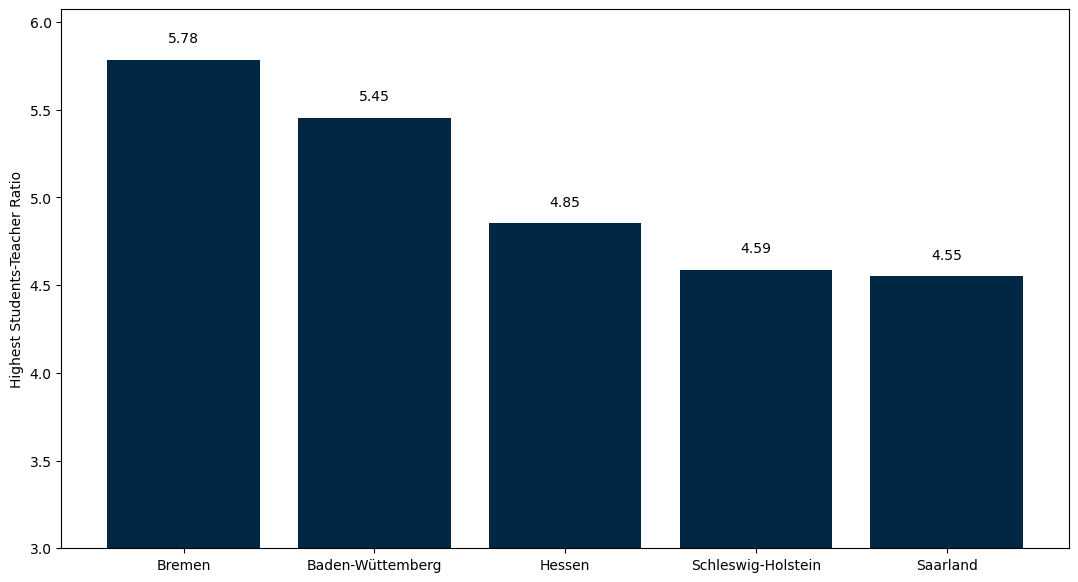

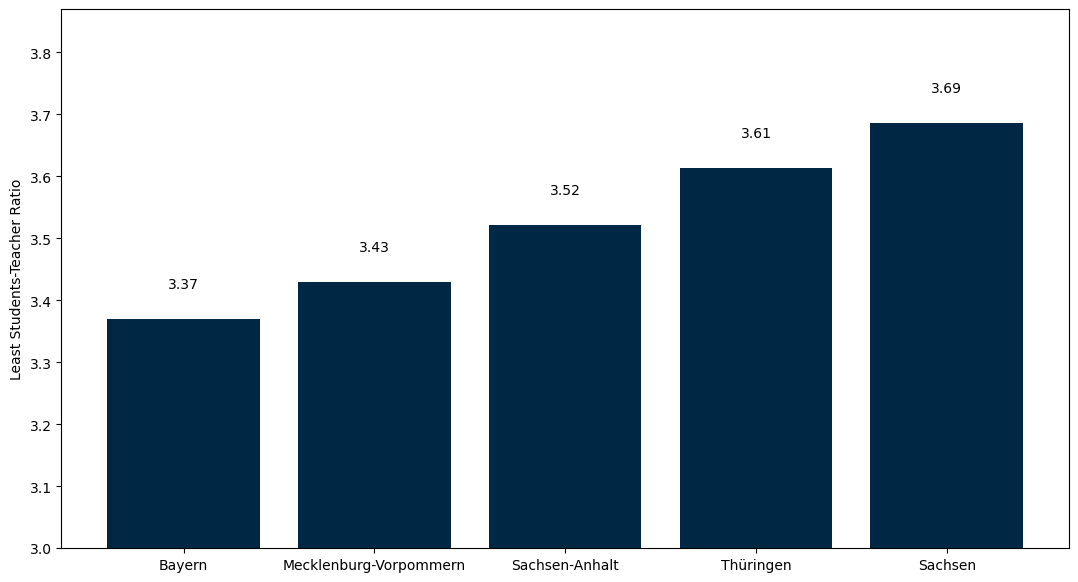

In [11]:
# Sort the states based on average Pass Rate
top_states_highest = avg_special_hours_student.sort_values('avg_special_hours_student', ascending=False).head(5)
top_states_lowest = avg_special_hours_student.sort_values('avg_special_hours_student', ascending=True).head(5)

plt.figure(figsize=(13, 7))
#plt.rcParams.update({'font.size': 14})
# Create a bar chart for top 3 states with highest Pass Rate
plt.bar(top_states_highest['Federal States'], top_states_highest['avg_special_hours_student'], color='#002845')
plt.grid(False)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
#plt.xlabel('State')
plt.ylabel('Highest Students-Teacher Ratio')
#plt.title('Top 5 States with Highest Passing Rate in the Last Decade')
plt.ylim(bottom=3)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_highest['avg_special_hours_student']):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', color='black')
plt.show()



plt.figure(figsize=(13, 7))
# Create a bar chart for top 3 states with lowest Pass Rate
plt.bar(top_states_lowest['Federal States'], top_states_lowest['avg_special_hours_student'], color='#002845')
plt.grid(False)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
#plt.xlabel('State')
plt.ylabel('Least Students-Teacher Ratio')
#plt.title('Top 5 States with Highest Failing Rate in the Last Decade')
plt.ylim(bottom=3)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_lowest['avg_special_hours_student']):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', color='black')

plt.show()

In [3]:
hours_per_student_concat

,SchoolType,Baden-Wüttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Deutschland,Year
0,Allgemeinbildende Schulen,1.713945,1.585794,1.754554,1.770079,1.714481,1.690766,1.648265,1.788607,1.566029,1.523436,1.617019,1.699214,1.782667,1.856108,1.524647,1.830527,1.626870,2011
1,Förderschulen,5.322422,3.174173,3.976845,4.241515,4.702265,3.895806,4.469091,3.223718,3.733670,4.037930,4.060919,4.326110,3.722410,3.548922,4.031242,3.720916,4.039715,2011
2,Sekundarstufe I,1.573263,1.560799,1.795453,1.787801,1.664775,1.611509,1.533235,1.830719,1.482593,1.438379,1.466960,1.545581,1.751113,1.772398,1.472075,1.822960,1.549745,2011
3,Sekundarstufe I,1.315289,1.137183,1.326992,1.277223,1.114163,1.192419,1.171841,1.179430,1.151818,1.112564,1.164155,1.131329,1.414989,1.175738,1.095811,1.395624,1.189990,2011
4,Allgemeinbildende Schulen,1.725627,1.603869,1.755236,1.763702,1.721590,1.720837,1.668937,1.785292,1.601169,1.549926,1.652337,1.688443,1.785647,1.862386,1.530059,1.804278,1.645586,2012
5,Förderschulen,5.403411,3.247547,3.910765,4.310855,5.251629,4.061269,4.130790,3.229463,3.792095,4.149017,4.060364,4.292946,3.693002,3.573094,4.222747,3.696530,4.082579,2012
6,Sekundarstufe I,1.579648,1.572521,1.808520,1.778945,1.700550,1.619456,1.509934,1.824199,1.517851,1.454013,1.490154,1.528260,1.734268,1.795297,1.484378,1.796843,1.561082,2012
7,Sekundarstufe I,1.302918,1.148648,1.363451,1.275898,1.112213,1.127068,1.248705,1.232783,1.156436,1.139490,1.182125,1.155762,1.466864,1.217960,1.105302,1.428361,1.207022,2012
8,Allgemein bildende Schulen,1.755273,1.624919,1.751178,1.752888,1.729828,1.736172,1.714857,1.726254,1.625840,1.580078,1.671140,1.713495,1.780135,1.811333,1.544663,1.792424,1.666525,2013
9,Förderschulen,5.509200,3.330991,4.089878,4.295465,5.886000,3.977055,4.526066,3.393113,3.849093,4.152384,4.080063,4.250489,3.816398,3.637269,4.245348,3.750099,4.169521,2013


In [2]:
# Filter by school types
school_type = ['Allgemeinbildende Schulen']
hours_per_student = hours_per_student_concat[hours_per_student_concat['SchoolType'].isin(school_type)]
hours_per_student

,SchoolType,Baden-Wüttemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Deutschland,Year
0,Allgemeinbildende Schulen,1.713945,1.585794,1.754554,1.770079,1.714481,1.690766,1.648265,1.788607,1.566029,1.523436,1.617019,1.699214,1.782667,1.856108,1.524647,1.830527,1.626870,2011
4,Allgemeinbildende Schulen,1.725627,1.603869,1.755236,1.763702,1.721590,1.720837,1.668937,1.785292,1.601169,1.549926,1.652337,1.688443,1.785647,1.862386,1.530059,1.804278,1.645586,2012
8,Allgemeinbildende Schulen,1.755273,1.624919,1.751178,1.752888,1.729828,1.736172,1.714857,1.726254,1.625840,1.580078,1.671140,1.713495,1.780135,1.811333,1.544663,1.792424,1.666525,2013
12,Allgemeinbildende Schulen,1.759627,1.637669,1.765525,1.729823,1.733909,1.740147,1.720079,1.747396,1.667086,1.588511,1.704415,1.749660,1.765915,1.780940,1.553185,1.763528,1.677167,2014
16,Allgemeinbildende Schulen,1.776224,1.644062,1.784090,1.694929,1.753212,1.770775,1.687363,1.784863,1.675079,1.597151,1.717875,1.786633,1.759088,1.742325,1.585825,1.758017,1.683446,2015
20,Allgemeinbildende Schulen,1.782682,1.658579,1.822594,1.705613,1.754116,1.791705,1.678087,1.782501,1.703137,1.542109,1.717428,1.816584,1.745611,1.730983,1.603175,1.738068,1.678181,2016
24,Allgemeinbildende Schulen,1.783199,1.651835,1.811864,1.738004,1.778068,1.806473,1.688414,1.770290,1.719404,1.614054,1.738910,1.840153,1.721867,1.675912,1.633272,1.717964,1.697122,2017
28,Allgemeinbildende Schulen,1.793254,1.663410,1.805161,1.747538,1.798850,1.794142,1.710114,1.762857,1.738135,1.635751,1.758700,1.770557,1.719757,1.670266,1.665814,1.682262,1.708988,2018
32,Allgemeinbildende Schulen,1.805242,1.662532,1.804546,1.745280,1.828538,1.796555,1.769861,1.771500,1.764166,1.674259,1.772536,1.859407,1.695926,1.646907,1.687258,1.671799,1.727479,2019
36,Allgemeinbildende Schulen,1.820283,1.657379,1.801254,1.737565,1.841847,1.797548,1.791248,1.748130,1.745864,1.650949,1.777032,1.860587,1.667039,1.639959,1.694034,1.652678,1.721112,2020


In [ ]:
avg_student_hours_student = special_hours_per_student.groupby('Year').sum().mean().reset_index()
avg_student_hours_student.rename(columns={'index':'Federal States',
                                        0: 'avg_student_hours_student'}, inplace=True)

In [ ]:
# Sort the states based on average Pass Rate
top_states_highest = avg_student_hours_student.sort_values('avg_student_hours_student', ascending=False).head(5)
top_states_lowest = avg_student_hours_student.sort_values('avg_student_hours_student', ascending=True).head(5)

plt.figure(figsize=(13, 7))
#plt.rcParams.update({'font.size': 14})
# Create a bar chart for top 3 states with highest Pass Rate
plt.bar(top_states_highest['Federal States'], top_states_highest['avg_student_hours_student'], color='#002845')
plt.grid(False)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
#plt.xlabel('State')
plt.ylabel('Highest Student-Teacher Ratio')
#plt.title('Top 5 States with Highest Passing Rate in the Last Decade')
plt.ylim(bottom=3)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_highest['avg_student_hours_student']):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', color='black')
plt.show()



plt.figure(figsize=(13, 7))
# Create a bar chart for top 3 states with lowest Pass Rate
plt.bar(top_states_lowest['Federal States'], top_states_lowest['avg_student_hours_student'], color='#002845')
plt.grid(False)  # Add grid lines
plt.tick_params(axis='x')#, rotation=75)
#plt.xlabel('State')
plt.ylabel('Least Student-Teacher Ratio')
#plt.title('Top 5 States with Highest Failing Rate in the Last Decade')
plt.ylim(bottom=3)  # Set the y-axis lower limit to 0

# Add value labels on top of each bar
for i, v in enumerate(top_states_lowest['avg_student_hours_student']):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', color='black')

plt.show()